In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pycountry_convert is used to convert country name to continent name
import pycountry_convert as pc
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

**Business Understanding** <br>
This project tries to answer the following questions using the the Stack Overflow Annual Developer Survey dataset.
- What is the most popular programming language in the past five years? 
- What is the most popular IDE for professional software developers in the past five years? 
- How much does professional software developers make in the past five years? What is the salary increase rate?

# 1. Gather

In [2]:
# reading source data from csv files
df2015 = pd.read_csv('data/2015.csv', header=1)
df2016 = pd.read_csv('data/2016.csv')
df2017 = pd.read_csv('data/2017.csv')
df2018 = pd.read_csv('data/2018.csv')
df2019 = pd.read_csv('data/2019.csv')

# 2. Assess

**Data Understanding** <br>
After loading the dataset, the first step is to understand the dataset. I need to know how many rows and columns for each dataset? How many missing values in the dataset? Which columns are related to the business questions? What are the data types? etc.

In [3]:
print('shape of 2015:', df2015.shape)
print('shape of 2016:', df2016.shape)
print('shape of 2017:', df2017.shape)
print('shape of 2018:', df2018.shape)
print('shape of 2019:', df2019.shape)

shape of 2015: (26086, 222)
shape of 2016: (56030, 66)
shape of 2017: (51392, 154)
shape of 2018: (98855, 129)
shape of 2019: (88883, 85)


In [4]:
df2016.isnull().mean().sort_values()

Unnamed: 0                          0.000000
collector                           0.000000
age_range                           0.005408
gender                              0.007924
country                             0.008959
so_region                           0.011422
age_midpoint                        0.012386
un_subregion                        0.012797
self_identification                 0.032625
employment_status                   0.115188
experience_range                    0.116188
experience_midpoint                 0.116188
occupation                          0.116206
aliens                              0.122309
tech_do                             0.125022
big_mac_index                       0.128592
tech_want                           0.144173
programming_ability                 0.161485
occupation_group                    0.162342
hobby                               0.167000
unit_testing                        0.167285
commit_frequency                    0.168338
desktop_os

In [5]:
df2017.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [6]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (total 66 columns):
Unnamed: 0                          56030 non-null int64
collector                           56030 non-null object
country                             55528 non-null object
un_subregion                        55313 non-null object
so_region                           55390 non-null object
age_range                           55727 non-null object
age_midpoint                        55336 non-null float64
gender                              55586 non-null object
self_identification                 54202 non-null object
occupation                          49519 non-null object
occupation_group                    46934 non-null object
experience_range                    49520 non-null object
experience_midpoint                 49520 non-null float64
salary_range                        46121 non-null object
salary_midpoint                     41742 non-null float64
big_mac_index      

In [7]:
df2019.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [8]:
list(df2018.columns)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [9]:
df2018.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


# 3. Clean

**Data Preparation** <br>
Data cleaning is necessary for further analysis. <br> 
The salary difference between countries are so big. It doesn't make sense to calculate the average salary of professional software developers for the whole world. Since we have data from more than 170 countries and dependent territories, it also does not make sense to calculate the average salary for every country. So I added a column named 'continent', and calculated the average salary based on different continents.<br>
**Missing Values** <br>
Because we have a very large dataset and only a small fraction of data has no salary information, so I removed the rows where salary information are missing.<br>

In [10]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
def country2continent(country):
    '''
    Convert country name to continent name
    e.g. input 'USA'  ouput 'North America'
    '''
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = continents[continent_code]
    except:
        continent_name = 'not find'
    return continent_name

In [11]:
def compensation2int(compensation):
    '''
    Data type convertion from 'object' to 'float'
    '''
    try:
        res = float(compensation)
    except:
        res = np.nan
    return res

### 3.1 Clean data for year 2015

In [12]:
# create a new column 'continent' based on 'Country'
df2015['continent'] = df2015['Country'].apply(country2continent)
# Convert the datatype of Compensation from object to float
df2015['Compensation: midpoint']=df2015['Compensation: midpoint'].apply(compensation2int)
# delete rows if Compensation column is np.nan/missing
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df2015_remove_nan = df2015.dropna(subset=['Compensation: midpoint'],axis = 0)

### 3.2 Clean data for year 2016

In [13]:
# create a new column 'continent' based on 'Country'
df2016['continent'] = df2016['country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df2016_remove_nan = df2016.dropna(subset=['salary_midpoint'],axis = 0)

### 3.3 Clean data for year 2017

In [14]:
# create a new column 'continent' based on 'Country'
df2017['continent'] = df2017['Country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df2017_remove_nan = df2017.dropna(subset=['Salary'],axis = 0)

### 3.4 Clean data for year 2018

In [15]:
# create a new column 'continent' based on 'Country'
df2018['continent'] = df2018['Country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df2018_remove_nan = df2018.dropna(subset=['ConvertedSalary'], axis=0)

### 3.5 Clean data for year 2019

In [16]:
# create a new column 'continent' based on 'Country'
df2019['continent'] = df2019['Country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df2019_remove_nan = df2019.dropna(subset=['ConvertedComp'], axis=0)

# 4. Analyze and model

### 4.1 Average salary calculation

** Incorrect values** <br>
When I examining the dataset in the data assessment step, I saw some full time developer have salary of 0, while others have salary of 10^30 dollars! These are obviously not true. So I decided to only include salaries within 0.1 - 0.9 quantile for the average salary calucation. I believe this is reasonable.

**4.1.1 Year 2015**

In [17]:
# only considering full time developers
temp = df2015_remove_nan[df2015_remove_nan['Employment Status']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['Compensation: midpoint'].quantile(0.1)
high = temp['Compensation: midpoint'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['Compensation: midpoint']>=low]
temp = temp[temp['Compensation: midpoint']<=high]
df_salary_2015 = temp.groupby(['continent']).mean()['Compensation: midpoint']

**4.1.2 Year 2016**

In [18]:
# only considering full time developers
temp = df2016_remove_nan[df2016_remove_nan['employment_status']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['salary_midpoint'].quantile(0.1)
high = temp['salary_midpoint'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['salary_midpoint']>=low]
temp = temp[temp['salary_midpoint']<=high]
df_salary_2016 = temp.groupby(['continent']).mean()['salary_midpoint']

**4.1.3 Year 2017**

In [19]:
# only considering full time developers
temp = df2017_remove_nan[df2017_remove_nan['EmploymentStatus']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['Salary'].quantile(0.1)
high = temp['Salary'].quantile(0.9)
temp = temp[temp['Salary']>=low]
temp = temp[temp['Salary']<=high]
# only use the salary that is within the range between 0.1 and 0.9 quantile
df_salary_2017 = temp.groupby(['continent']).mean()['Salary']

**4.1.4 Year 2018**

In [20]:
# only considering full time developers
temp = df2018_remove_nan[df2018_remove_nan['Employment']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['ConvertedSalary'].quantile(0.1)
high = temp['ConvertedSalary'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['ConvertedSalary']>=low]
temp = temp[temp['ConvertedSalary']<=high]
df_salary_2018 = temp.groupby(['continent']).mean()['ConvertedSalary']

**4.1.5 Year 2019**

In [21]:
temp = df2019_remove_nan[df2019_remove_nan['Employment']=='Employed full-time']
low = temp['ConvertedComp'].quantile(0.1)
high = temp['ConvertedComp'].quantile(0.9)
print(low, high)
temp = temp[temp['ConvertedComp']>=low]
temp = temp[temp['ConvertedComp']<=high]
df_salary_2019 = temp.groupby(['continent']).mean()['ConvertedComp']

10914.0 180000.0


### 4.2 Most popular programming languages

**4.2.1 Year 2015**

In [22]:
# get the columns related to the programming languages
column = [x for x in df2015.columns if x.startswith('Current Lang & Tech')]
df2015[column].isnull().mean().sort_values()[0:10]

Current Lang & Tech: JavaScript    0.541440
Current Lang & Tech: SQL           0.638158
Current Lang & Tech: Java          0.684927
Current Lang & Tech: C#            0.733612
Current Lang & Tech: PHP           0.749712
Current Lang & Tech: Python        0.799203
Current Lang & Tech: C++           0.826382
Current Lang & Tech: SQL Server    0.841716
Current Lang & Tech: Android       0.842444
Current Lang & Tech: C             0.861535
dtype: float64

**4.2.2 Year 2016**

In [23]:
all_languages = []
for x in list(df2016['tech_do'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 27385),
 ('SQL', 21976),
 ('Java', 17942),
 ('C#', 15283),
 ('PHP', 12780),
 ('Python', 12282),
 ('C++', 9589),
 ('SQL Server', 9306),
 ('AngularJS', 8823),
 ('Android', 8601)]

**4.2.3 Year 2017**

In [24]:
all_languages = []
for x in list(df2017['HaveWorkedLanguage'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 22875),
 ('SQL', 18754),
 ('Java', 14524),
 ('C#', 12476),
 ('Python', 11704),
 ('PHP', 10290),
 ('C++', 8155),
 ('C', 6974),
 ('TypeScript', 3488),
 ('Ruby', 3324)]

**4.2.4 Year 2018**

In [25]:
all_languages = []
for x in list(df2018['LanguageWorkedWith'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 54686),
 ('HTML', 53628),
 ('CSS', 50979),
 ('SQL', 44670),
 ('Java', 35521),
 ('Bash/Shell', 31172),
 ('Python', 30359),
 ('C#', 26954),
 ('PHP', 24071),
 ('C++', 19872)]

**4.2.5 Year 2019**

In [26]:
all_languages = []
for x in list(df2019['LanguageWorkedWith'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523)]

### 4.3 Most popular IDEs

I only used the survey data of the recent four years. This is because the survey data in Year 2015 doesn't include information about IDE.

**4.3.1 Year 2016**

In [27]:
all_editor = []
for x in list(df2016['dev_environment'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Notepad++', 16607),
 ('Visual Studio', 16580),
 ('Sublime', 14434),
 ('Vim', 12180),
 ('Eclipse', 10564),
 ('IntelliJ', 7938),
 ('Android Studio', 6073),
 ('Atom', 5825),
 ('Xcode', 4822),
 ('NetBeans', 3773)]

**4.3.2 Year 2017**

In [28]:
all_editor = []
for x in list(df2017['IDE'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Visual Studio', 13677),
 ('Notepad++', 12681),
 ('Sublime Text', 9978),
 ('Vim', 9679),
 ('Eclipse', 7899),
 ('IntelliJ', 7418),
 ('Visual Studio Code', 6826),
 ('Atom', 6540),
 ('Android Studio', 5953),
 ('Xcode', 3850)]

**4.3.3 Year 2018**

In [29]:
all_editor = []
for x in list(df2018['IDE'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Visual Studio Code', 26280),
 ('Visual Studio', 25870),
 ('Notepad++', 25755),
 ('Sublime Text', 21810),
 ('Vim', 19477),
 ('IntelliJ', 18765),
 ('Android Studio', 14558),
 ('Eclipse', 14213),
 ('Atom', 13576),
 ('PyCharm', 9027)]

**4.3.4 Year 2019**

In [30]:
all_editor = []
for x in list(df2019['DevEnviron'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Visual Studio Code', 44311),
 ('Visual Studio', 27490),
 ('Notepad++', 26621),
 ('IntelliJ', 22166),
 ('Vim', 22163),
 ('Sublime Text', 20424),
 ('Android Studio', 14787),
 ('Eclipse', 12591),
 ('PyCharm', 11724),
 ('Atom', 11636)]

# 5. Visualize

The first two figures were generated with Tableau. This is because Tableau is good at drawing figures based on rank. The last two figures were generated using matplotlib.

### 5.1 Figure 1. The most popular programming languages

This figure is generated using Tableau with the results from Part 4.2.

### 5.2 Figure 2. The most popular IDEs

This figure is generated using Tableau with the results from Part 4.3.

### 5.3 Figure 3. Average salary of full time professional developers

In [31]:
df_salary_2015.name = '2015'
df_salary_2016.name = '2016'
df_salary_2017.name = '2017'
df_salary_2018.name = '2018'
df_salary_2019.name = '2019'

In [32]:
df_salary = pd.DataFrame([df_salary_2015,df_salary_2016,df_salary_2017,df_salary_2018,df_salary_2019])
df_salary = df_salary/1000


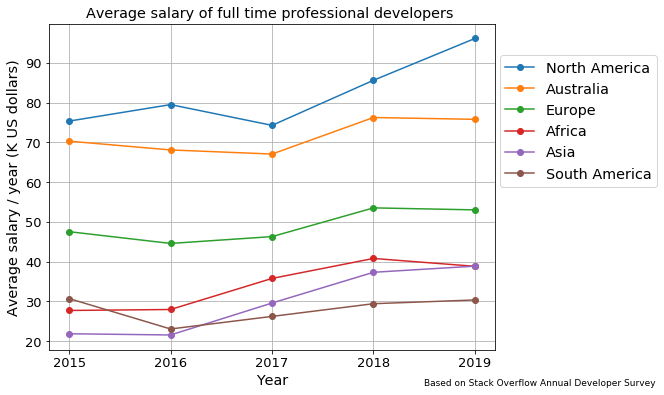

In [33]:
plt.figure(figsize=(8,6))
plt.title('Average salary of full time professional developers ',fontsize='x-large')
plt.xlabel("Year",fontsize='x-large')
plt.ylabel("Average salary / year (K US dollars)",fontsize='x-large')
plt.plot(df_salary['North America'],'-o',label='North America')
plt.plot(df_salary['Australia'],'-o',label='Australia')
plt.plot(df_salary['Europe'],'-o',label='Europe')
plt.plot(df_salary['Africa'],'-o',label='Africa')
plt.plot(df_salary['Asia'],'-o',label='Asia')
plt.plot(df_salary['South America'],'-o',label='South America')
plt.grid('on')
plt.tick_params(labelsize=13)
lg=plt.legend(loc=[1.01, 0.5],fontsize='x-large')
plt.text(3.5,9,'Based on Stack Overflow Annual Developer Survey',fontsize=9)
plt.savefig('salary_increase.png',dpi=300, bbox_extra_artists=(lg,),bbox_inches='tight')
plt.show()

### 5.4 Figure 4. The salary increase rate starting from Year 2015 in percent %

It is also interesting to know the salary increase rate, So I calcualted the cumulative salary increase rate using Year 2015 as the baseline.

In [34]:
# get the salary increase percentage using Year 2015 as the baseline
df_salary_percentage=(df_salary/df_salary.iloc[0,:]-1)*100

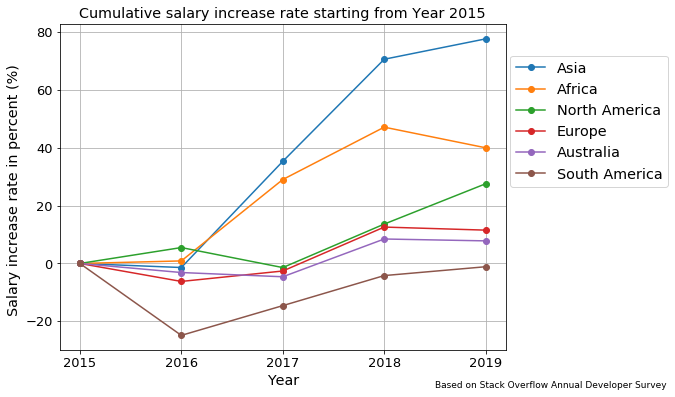

In [35]:
plt.figure(figsize=(8,6))
plt.title('Cumulative salary increase rate starting from Year 2015',fontsize='x-large')
plt.xlabel("Year",fontsize='x-large')
plt.ylabel("Salary increase rate in percent (%) ",fontsize='x-large')
plt.plot(df_salary_percentage['Asia'],'-o',label='Asia')
plt.plot(df_salary_percentage['Africa'],'-o',label='Africa')
plt.plot(df_salary_percentage['North America'],'-o',label='North America')
plt.plot(df_salary_percentage['Europe'],'-o',label='Europe')
plt.plot(df_salary_percentage['Australia'],'-o',label='Australia')
plt.plot(df_salary_percentage['South America'],'-o',label='South America')
plt.grid('on')
plt.tick_params(labelsize=13)
plt.text(3.5,-43,'Based on Stack Overflow Annual Developer Survey',fontsize=9)
lg=plt.legend(loc=[1.01, 0.5], fontsize='x-large')
plt.savefig('salary_increase_percentage.png',dpi=300, bbox_extra_artists=(lg,),bbox_inches='tight')
plt.show()